# **Linear Regression**

## Load Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("advertising.csv")

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## Assignment 1

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [5]:
def get_column(data, index):
    return [row[index] for row in data]

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=1)
    radio_data = get_column(data, 1)

    # get newspaper (index=2)
    newspaper_data = get_column(data, 2)

    # get sales (index=3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y

In [6]:
# Question 1: A
X , y = prepare_data ("advertising.csv")
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


## Assignment 2: training data use one sample - linear regression

In [7]:
def initialize_params():
    # # Random values
    # w1 = random.gauss(mu=0.0, sigma=0.01)
    # w2 = random.gauss(mu=0.0, sigma=0.01)
    # w3 = random.gauss(mu=0.0, sigma=0.01)
    # b = 0

    # Default values
    w1 , w2 , w3 , b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

In [8]:
def predict(x1, x2, x3, w1, w2, w3, b):
    return w1*x1 + w2*x2 + w3*x3 + b

In [9]:
# Question 2: A
y = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y)

1.0


In [11]:
def compute_loss_mse(y_hat, y):
    return (y_hat - y)**2

In [12]:
# Question 3: A
l = compute_loss_mse(y_hat=1, y=0.5)
print(l)

0.25


In [14]:
def compute_gradient_wi(xi, y, y_hat):
    return 2*(y_hat - y)*xi

def compute_gradient_b(y, y_hat):
    return 2*(y_hat - y)

In [15]:
# Question 4: A
# MSE loss
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


In [16]:
# Question 5: B
g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


In [17]:
def update_weight_wi(wi, dl_dwi, lr):
    return wi - lr*dl_dwi

In [18]:
def update_weight_b(b, dl_db, lr):
    return b - lr*dl_db

In [19]:
# Question 6: A
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(after_wi)

1.000005


In [20]:
# Question 7: A
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)

0.50001


In [21]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    # initialize parameters: w1, w2, w3 và b
    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mse(y, y_hat)

            # compute gradient w1 , w2 , w3 , b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # logging
            losses.append(loss)

    return (w1, w2, w3, b, losses)

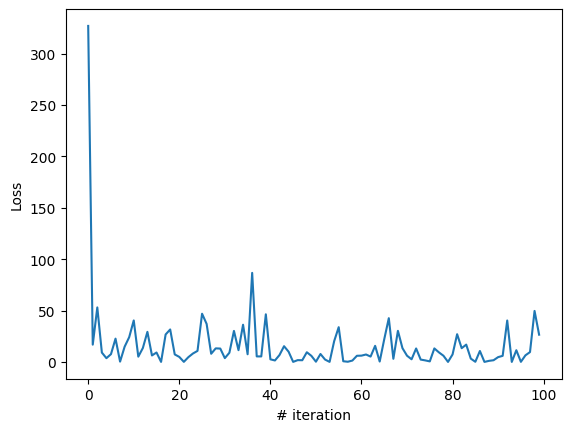

In [22]:
# Load X, y
x, y = prepare_data("advertising.csv")
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel("# iteration")
plt.ylabel("Loss")
plt.show()

In [23]:
# Question 8: A
X, y = prepare_data("advertising.csv")
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
print(w1, w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [24]:
# Question 9: B
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3
X, y = prepare_data("advertising.csv")
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f"predicted sales is { sales }")

predicted sales is 8.176413319549823


In [25]:
def compute_loss_mae(y_hat, y):
    return abs(y_hat - y)

In [26]:
# Question 10: A
l = compute_loss_mae(y_hat=1, y=0.5)
print(l)


0.5


## Assignment 3: training data use batch N samples - linear regression

In [27]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50 , lr=1e-5, loss_type="mse"):
    losses = []

    # initialize parameters: w1, w2, w3 và b
    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            if loss_type == "mae":
                loss = compute_loss_mae(y, y_hat)
            else:
                loss = compute_loss_mse(y, y_hat)

            # accumulate loss
            loss_total += loss

            # compute gradient w1 , w2 , w3 , b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # accumulate gradient w1 , w2 , w3 , b
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # ( after processing N samples ) - update parameters
        w1 = update_weight_wi(w1, dw1_total/N, lr)
        w2 = update_weight_wi(w2, dw2_total/N, lr)
        w3 = update_weight_wi(w3, dw3_total/N, lr)
        b = update_weight_b(b, db_total/N, lr)

        # logging
        losses.append(loss_total/N)

    return (w1, w2, w3, b, losses)

In [30]:
X, y = prepare_data("advertising.csv")
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5, loss_type="mse")

[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 8.972113108729593, 8.916357838686066, 8.86203115641928, 8.809

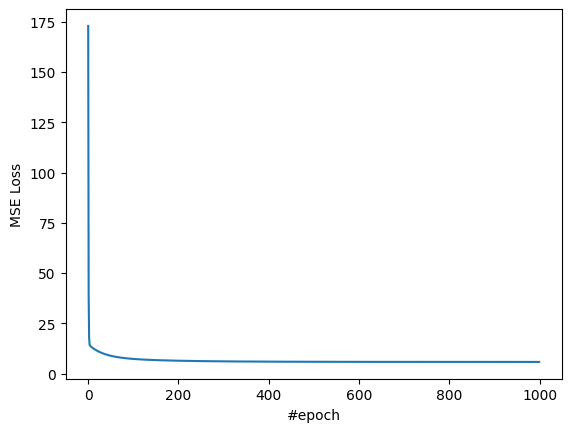

In [31]:
print(losses)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.show()

In [35]:
# Question 11: D
X, y = prepare_data("advertising.csv")
# using MSE loss
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=50, lr=1e-5, loss_type="mse")
print(w1, w2, w3)

0.0777391352775665 0.05644769904625777 0.04135488482198375


In [36]:
X, y = prepare_data("advertising.csv")
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5, loss_type="mae")
print(w1, w2, w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


[12.537758993110772, 5.905253690937074, 3.7290201321746137, 3.280103342013847, 3.1836865214240593, 3.1504551681146706, 3.1282032310037176, 3.107834776878128, 3.0877653671823877, 3.067869077619822, 3.0482166503078565, 3.02883345816351, 3.0097268958233707, 2.990926260388694, 2.9724018229858893, 2.954147483295836, 2.936159497829541, 2.9184793882434996, 2.9013201899015386, 2.8848065446993694, 2.8692913979087806, 2.8540808729447424, 2.8391539128581824, 2.824441258695949, 2.809939593214031, 2.795661552510065, 2.781611479829696, 2.7677616004414416, 2.7541088214511316, 2.7406510256334013, 2.727970116901554, 2.7155029638904806, 2.703211839174965, 2.6910940299623816, 2.6792629854501695, 2.6676459659520204, 2.6561923391983115, 2.645064404704684, 2.6341944320960224, 2.623535606535408, 2.6130255229490116, 2.6026618964920454, 2.592442478315787, 2.5823650549969863, 2.5725241259925906, 2.562865212228721, 2.553339917055549, 2.5439461929615637, 2.5347454167598515, 2.525816782277532, 2.517347376120849, 2

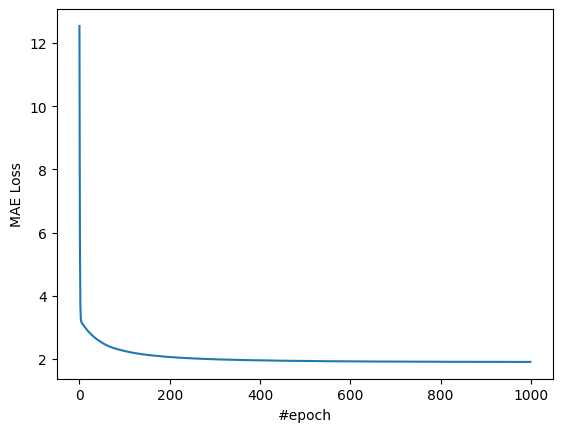

In [37]:
print(losses)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MAE Loss")
plt.show()

## Assignment 4

In [38]:
import numpy as np
import random

def prepare_data(file_name_dataset):
    # Load the dataset
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    # Function to extract a column from a dataset
    def get_column(matrix, index):
        return [row[index] for row in matrix]

    # Get the tv, radio, newspaper, and sales data
    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)

    # Prepare the input X (features) and output y (target)
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data

    return X, y


def initialize_params():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)

    # Return random initialized parameters for real application
    # return [bias, w1, w2, w3]

    return [0, -0.01268850433497871, 0.004752496982185252, 0.007379617153864385]


def predict(X_features, weights):
    # Predict output by using y = x0*b + x1*w1 + x2*w2 + x3*w3
    # Assuming weights is a list [bias, w1, w2, w3]
    result = X_features[0]*weights[0] + X_features[1]*weights[1] + X_features[2]*weights[2] + X_features[3]*weights[3]
    return result


def compute_loss(y_hat, y):
    # Return squared error loss
    return (y_hat - y) ** 2


def compute_gradient_w(X_features, y, y_hat):
    # Assuming a basic gradient calculation for the weights
    dl_dw1 = 2 * X_features[1] * (y_hat - y)
    dl_dw2 = 2 * X_features[2] * (y_hat - y)
    dl_dw3 = 2 * X_features[3] * (y_hat - y)
    dl_db = 2 * (y_hat - y)  # Gradient for bias

    dl_dweights = [dl_db, dl_dw1, dl_dw2, dl_dw3]
    return dl_dweights


def update_weight(weights, dl_dweights, lr):
    # Update weights using gradient descent formula
    new_weights = [w - lr * dw for w, dw in zip(weights, dl_dweights)]
    return new_weights


def implement_linear_regression(X_feature, y_output, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_output)

    for epoch in range(epoch_max):
        # print("Epoch", epoch)
        for i in range(N):
            # Get a sample - row i
            features_i = X_feature[i]
            y = y_output[i]

            # Compute output
            y_hat = predict(features_i, weights)

            # Compute loss
            loss = compute_loss(y_hat, y)

            # Compute gradient
            dl_dweights = compute_gradient_w(features_i, y, y_hat)

            # Update parameters
            weights = update_weight(weights, dl_dweights, lr)

            # Logging
            losses.append(loss)

    return weights, losses

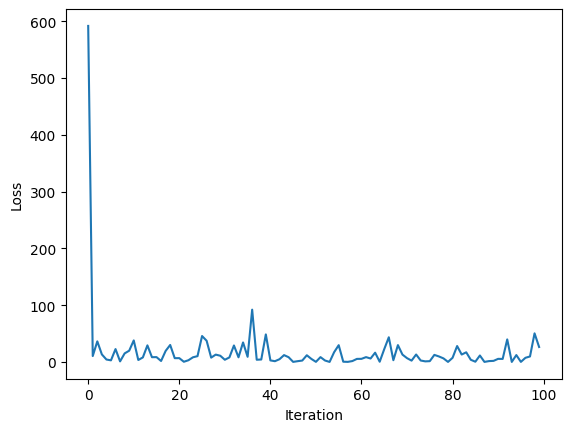

In [39]:
# Assuming data loading function prepare_data is defined elsewhere
X, y = prepare_data('advertising.csv')
weights, losses = implement_linear_regression(X, y)

# Plotting the loss curve
plt.plot(losses[0:100])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

In [40]:
# Question 12: A
X, y = prepare_data('advertising.csv')
W, L = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
print(L[9999])

31.339223408109948
